In [ ]:
# # При запуске кода в colab/kaggle можно склонировать данный репозиторий 
# !git clone https://github.com/AlexanderZah/InternVL-interp.git

In [2]:
import os
os.environ['ROOT_DIR'] = '/kaggle/working/InternVL-interp'

In [3]:
!pip install -U -r $ROOT_DIR/requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 MB 25.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.9 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 31.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 71.0 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.9.41
    Uninstalling nvidia-nvjitlink-cu12-12.9.41:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.9.41
  Attempting uninstall: nvidia-curand-cu12
    Found

In [4]:
import sys

sys.path.append(os.environ["ROOT_DIR"])
sys.path.append(os.environ["ROOT_DIR"] + '/methods')
sys.path.append(os.environ["ROOT_DIR"] + 'src/caption/internvl')

In [5]:
from methods.internvl_utils import retrieve_logit_lens_internvl, load_internvl_state
from methods.algorithms import internal_confidence, internal_confidence_heatmap, internal_confidence_segmentation
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np

In [6]:
model_state = load_internvl_state()

config.json:   0%|          | 0.00/3.74k [00:00<?, ?B/s]

configuration_internvl_chat.py:   0%|          | 0.00/4.04k [00:00<?, ?B/s]

configuration_intern_vit.py:   0%|          | 0.00/5.55k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/OpenGVLab/InternVL2_5-1B:
- configuration_intern_vit.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/OpenGVLab/InternVL2_5-1B:
- configuration_internvl_chat.py
- configuration_intern_vit.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_internvl_chat.py:   0%|          | 0.00/15.9k [00:00<?, ?B/s]

modeling_intern_vit.py:   0%|          | 0.00/18.1k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/OpenGVLab/InternVL2_5-1B:
- modeling_intern_vit.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


conversation.py:   0%|          | 0.00/15.3k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/OpenGVLab/InternVL2_5-1B:
- conversation.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/OpenGVLab/InternVL2_5-1B:
- modeling_internvl_chat.py
- modeling_intern_vit.py
- conversation.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
2025-06-24 14:49:03.851313: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750776544.028635      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:17

FlashAttention2 is not installed.


The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.


model.safetensors:   0%|          | 0.00/1.88G [00:00<?, ?B/s]

Sliding Window Attention is enabled but not implemented for `eager`; unexpected results may be encountered.


generation_config.json:   0%|          | 0.00/129 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/9.02k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/3.38M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/790 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/744 [00:00<?, ?B/s]

In [9]:
img_path = os.path.join(os.environ["ROOT_DIR"],"images/COCO_val2014_000000004108.jpg")
caption, softmax_probs = retrieve_logit_lens_internvl(model_state, img_path, num_patches=1)

/usr/local/lib/python3.11/dist-packages/bitsandbytes/nn/modules.py:463: UserWarning: Input type into Linear4bit is torch.float16, but bnb_4bit_compute_dtype=torch.float32 (default). This will lead to slow inference or training speed.
  warnings.warn(
`generation_config` default values have been modified to match model-specific defaults: {'bos_token_id': 151643}. If this is not desired, please set these values explicitly.
Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


Caption: The image shows a large dining table filled with various food items and a few people standing around it. On the table, there are several plates with food, including what appears to be a large cake with green icing and some other desserts. There are also several sandwiches, some of which are on the table, and a few other plates with food. Additionally, there are several cups, one of which has a straw, and a few other containers that might be for serving drinks or condiments. The food items are mostly of a similar type, possibly a type of sandwich or a similar meal, and they are mostly unidentifiable due to the distance and the angle of the photograph. The people in the image are not clearly visible due to the distance and the angle of the photograph.


In [16]:
class_ = 'cake'
internal_confidence(model_state['tokenizer'], softmax_probs, class_)

0.0047927657

[47384]


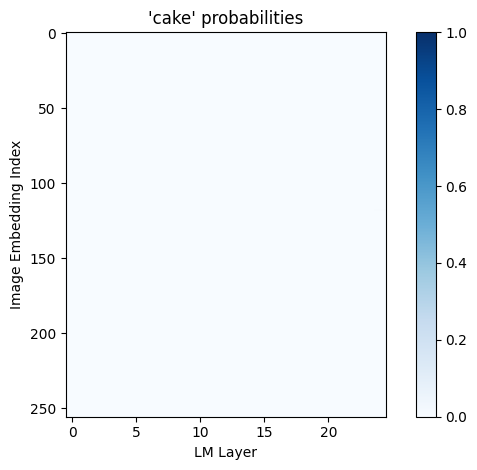

In [17]:

model_name = model_state['model_name']
heatmap_data = internal_confidence_heatmap(model_state['tokenizer'], softmax_probs, class_)
num_image_embeddings = softmax_probs.shape[2]
im = plt.imshow(heatmap_data, aspect=30/num_image_embeddings, cmap='Blues', interpolation='nearest')
plt.title(f"'{class_}' probabilities")
plt.xlabel("LM Layer")
plt.ylabel("Image Embedding Index")
plt.tight_layout()
plt.clim(0, 1)
plt.colorbar()
# plt.savefig(f'/kaggle/working/{model_name}/heatmap_{class_}.png')
plt.show()

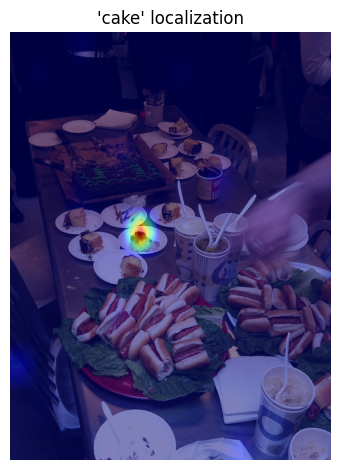

In [18]:
img = Image.open(img_path).convert("RGB")
img_width, img_height = img.size

segmentation = internal_confidence_segmentation(model_state['tokenizer'], softmax_probs, class_, 16)
segmentation_resized = (np.array(Image.fromarray(segmentation).resize((img_width, img_height), Image.BILINEAR)))

plt.imshow(img)
plt.imshow(segmentation_resized, cmap='jet', interpolation='bilinear', alpha=.5)
plt.axis('off')
plt.title(f"'{class_}' localization")
plt.tight_layout()
# plt.savefig(f'/kaggle/working/{model_name}/segmentation_{class_}.png')
plt.show()